In [69]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
sns.set(style='white',font_scale=1.5)

In [9]:
with open('../../data/QM_phase_plane/PARAMS.pickle','rb') as parameter_file:
    parameters = pickle.load(parameter_file)

P = parameters['N_PATTERNS']
M = parameters['N_CHAINS']
Q = parameters['PATTERNS_PER_CHAIN']


In [29]:
from math import prod
data = []
for p,m,q in product(P,M,Q):
    if len(data) == 0:
        data = pd.read_csv(f'../../data/QM_phase_plane/P{p}_M{m}_Q{q}.cvs',index_col=0)
    else:
        data_temp = pd.read_csv(f'../../data/QM_phase_plane/P{p}_M{m}_Q{q}.cvs',index_col=0)
        data = pd.concat([data,data_temp])

In [84]:
data['retrieval_probability'] = data['retrieval_quality']>1

In [61]:
def build_phase_diagram(M,Q,data,order_parameter=None):
    X,Y = np.meshgrid(Q,M)
    Z  = np.zeros((len(M),len(Q)))

    for (i,m),(j,q) in product(enumerate(M),enumerate(Q)):
        subset = data[(data.M==m)&(data.Q==q)]
        Z[i,j] = np.mean(subset[order_parameter])
    
    return X,Y,Z 



Text(0, 0.5, 'M (# of chains)')

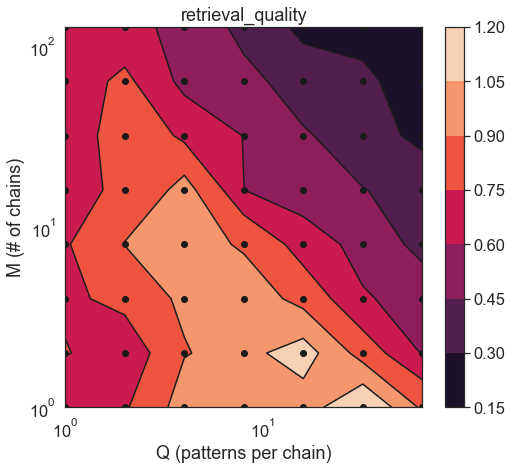

In [91]:
op = 'retrieval_quality'
sigma_smooth=0

X,Y,Z = build_phase_diagram(M,Q,data,order_parameter=op)
Z = gaussian_filter(Z, sigma_smooth)
plt.figure(figsize=(8,7)) 
plt.title(f'{op}')
plt.contourf(X, Y, Z)
plt.colorbar()
plt.contour(X, Y, Z,colors='k')
plt.scatter(X,Y,c='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Q (patterns per chain)')
plt.ylabel('M (# of chains)')


Text(0, 0.5, 'M (# of chains)')

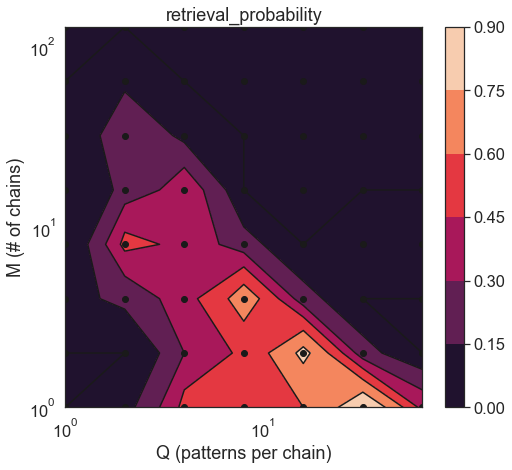

In [89]:
op = 'retrieval_probability'
sigma_smooth = 0

X,Y,Z = build_phase_diagram(M,Q,data,order_parameter=op)
Z = gaussian_filter(Z, sigma_smooth)
plt.figure(figsize=(8,7)) 
plt.title(f'{op}')
plt.contourf(X, Y, Z)
plt.colorbar()
plt.contour(X, Y, Z,colors='k')
plt.scatter(X,Y,c='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Q (patterns per chain)')
plt.ylabel('M (# of chains)')


Text(0, 0.5, 'M (# of chains)')

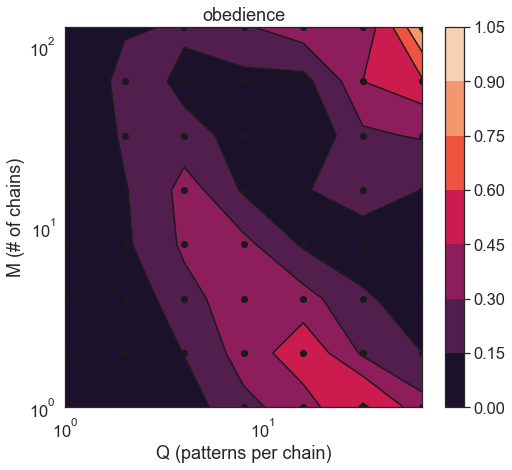

In [90]:
op = 'obedience'
sigma_smooth = 0
X,Y,Z = build_phase_diagram(M,Q,data,order_parameter=op)
Z = gaussian_filter(Z, sigma_smooth)
plt.figure(figsize=(8,7)) 
plt.title(f'{op}')
plt.contourf(X, Y, Z)
plt.colorbar()
plt.contour(X, Y, Z,colors='k')
plt.scatter(X,Y,c='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Q (patterns per chain)')
plt.ylabel('M (# of chains)')
